In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [77]:
debug = True
if debug:
    file_name = 'debug_data.pkl'
else:
    file_name = 'data.pkl'

In [78]:
df = pd.read_pickle('./Data/Rawdata/' + file_name)
df.head()

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,...,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name
0,BROOKLYN,3127307,814,DITMAS AVENUE,301068644,1,A3,NaN,05402,00006,...,NaN,<NA>,7188057474,2022-05-09,534076,40.636424,-73.970055,40.0,482.0,Flatbush
1,QUEENS,4295034,156-27,101 STREET,402062520,1,A1,NaN,14162,00047,...,NaN,<NA>,7182073673,2022-05-09,1332788,40.663310,-73.833189,32.0,884.0,Lindenwood-Howard Beach
2,BROOKLYN,3009015,209,18TH STREET,320934487,1,A1,N,00631,00065,...,NaN,<NA>,3474105860,2022-05-09,3233646,40.663647,-73.992672,38.0,143.0,Park Slope-Gowanus
3,QUEENS,4181643,84-05,FOREST PARKWAY,401838614,1,A1,Y,08858,00001,...,NaN,<NA>,7188050530,2022-05-09,2603282,40.695885,-73.862329,32.0,12.0,Woodhaven
4,BROOKLYN,3002691,36,SCHERMERHORN ST,321197735,1,A1,N,00270,00044,...,NaN,<NA>,9183288498,2022-05-09,3690904,40.691177,-73.992453,33.0,9.0,Brooklyn Heights-Cobble Hill


In [79]:
# These are the feature to keep from the project description provided
columns_to_keep = ['borough', 'job_type', 'block', 'lot', 'zip_code', 'work_type', 'bldg_type', "owner's_business_type", 
                   'non-profit', 'latitude', 'longitude', 'council_district', 'issuance_date', 'job_start_date', 
                   'permit_type']
df = df[columns_to_keep]
df.head()

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,longitude,council_district,issuance_date,job_start_date,permit_type
0,BROOKLYN,A3,05402,00006,11218.0,OT,1.0,INDIVIDUAL,N,40.636424,-73.970055,40.0,2000-08-11,2000-08-11,AL
1,QUEENS,A1,14162,00047,11414.0,NaN,1.0,INDIVIDUAL,N,40.663310,-73.833189,32.0,2005-08-26,2005-08-26,AL
2,BROOKLYN,A1,00631,00065,11215.0,NaN,1.0,INDIVIDUAL,N,40.663647,-73.992672,38.0,2016-09-13,2015-09-08,AL
3,QUEENS,A1,08858,00001,11421.0,NaN,1.0,INDIVIDUAL,N,40.695885,-73.862329,32.0,2012-08-15,2004-10-19,AL
4,BROOKLYN,A1,00270,00044,11201.0,NaN,1.0,CORPORATION,N,40.691177,-73.992453,33.0,2019-09-25,2017-11-08,AL


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39523 entries, 0 to 779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   borough                39523 non-null  category      
 1   job_type               39523 non-null  category      
 2   block                  39523 non-null  string        
 3   lot                    39523 non-null  string        
 4   zip_code               39503 non-null  string        
 5   work_type              32371 non-null  category      
 6   bldg_type              38959 non-null  category      
 7   owner's_business_type  37850 non-null  category      
 8   non-profit             37893 non-null  category      
 9   latitude               39419 non-null  float64       
 10  longitude              39419 non-null  float64       
 11  council_district       39419 non-null  category      
 12  issuance_date          39329 non-null  datetime64[ns]
 13  job

In [81]:
df.nunique()

borough                      5
job_type                     6
block                     8649
lot                        656
zip_code                   220
work_type                   12
bldg_type                    2
owner's_business_type       14
non-profit                   2
latitude                 29143
longitude                28966
council_district            51
issuance_date             8188
job_start_date            7991
permit_type                  8
dtype: int64

In [82]:
df.isna().sum()

borough                     0
job_type                    0
block                       0
lot                         0
zip_code                   20
work_type                7152
bldg_type                 564
owner's_business_type    1673
non-profit               1630
latitude                  104
longitude                 104
council_district          104
issuance_date             194
job_start_date              1
permit_type                 0
dtype: int64

In [83]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30338 entries, 0 to 30337
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   borough                30338 non-null  category      
 1   job_type               30338 non-null  category      
 2   block                  30338 non-null  string        
 3   lot                    30338 non-null  string        
 4   zip_code               30338 non-null  string        
 5   work_type              30338 non-null  category      
 6   bldg_type              30338 non-null  category      
 7   owner's_business_type  30338 non-null  category      
 8   non-profit             30338 non-null  category      
 9   latitude               30338 non-null  float64       
 10  longitude              30338 non-null  float64       
 11  council_district       30338 non-null  category      
 12  issuance_date          30338 non-null  datetime64[ns]
 13  j

In [84]:
df['block'] = df['block'].astype('float64')
df['lot'] = df['lot'].astype('float64')
df['zip_code'] = df['zip_code'].astype('float64')

In [85]:
df.dtypes

borough                        category
job_type                       category
block                           float64
lot                             float64
zip_code                        float64
work_type                      category
bldg_type                      category
owner's_business_type          category
non-profit                     category
latitude                        float64
longitude                       float64
council_district               category
issuance_date            datetime64[ns]
job_start_date           datetime64[ns]
permit_type                    category
dtype: object

In [86]:
df.describe()

,block,lot,zip_code,latitude,longitude
count,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000
mean,2948.738645,509.139956,10611.827378,40.728242,-73.947283
std,3205.276908,1845.651737,597.879840,0.070675,0.079534
min,0.000000,0.000000,10000.000000,40.499050,-74.252116
25%,873.000000,12.000000,10022.000000,40.688428,-73.988647
50%,1547.000000,31.000000,10453.000000,40.739276,-73.964204
75%,4049.000000,58.000000,11222.000000,40.767573,-73.910780
max,80996.000000,70004.000000,11697.000000,40.912394,-73.700767


In [87]:
df.permit_type.value_counts()

EW    16706
PL     7102
EQ     5484
AL     1046
DM        0
FO        0
NB        0
SG        0
Name: permit_type, dtype: int64

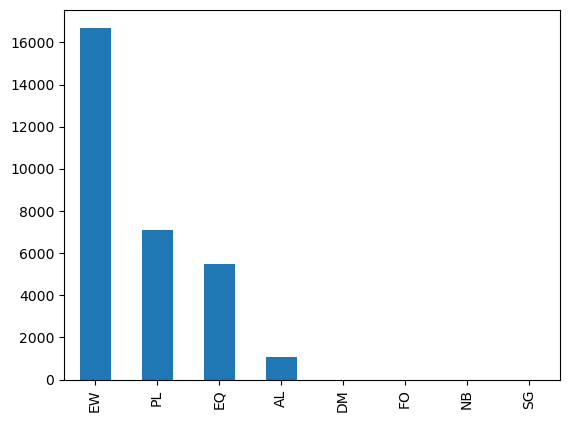

In [88]:
df.permit_type.value_counts().plot(kind='bar')
plt.show()

MANHATTAN        13509
BROOKLYN          6987
QUEENS            5931
BRONX             2481
STATEN ISLAND     1430
Name: borough, dtype: int64



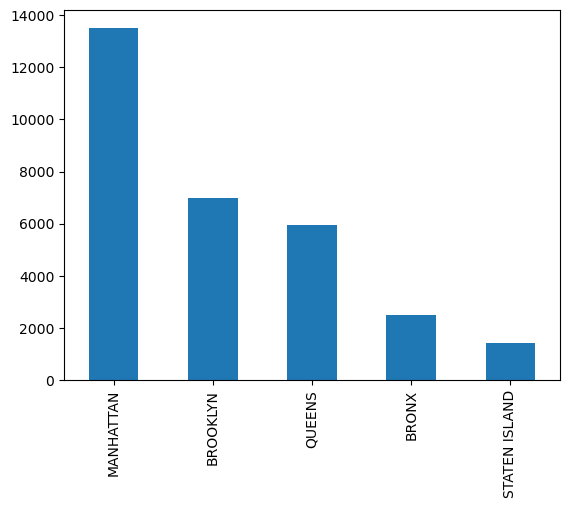





A2    22197
A3     3968
NB     2304
A1     1590
DM      279
SG        0
Name: job_type, dtype: int64



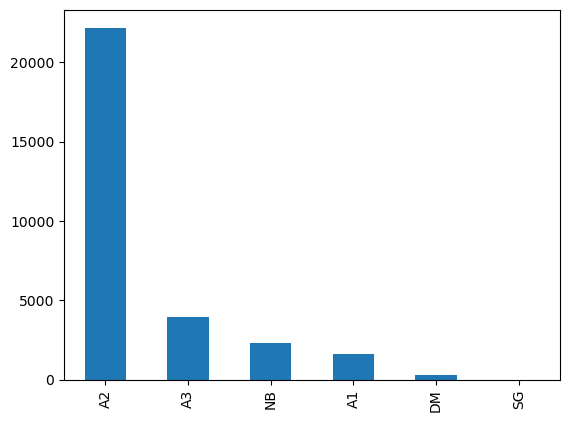





OT    11340
PL     7102
EQ     5484
MH     2798
SP     1298
BL      705
FP      666
FB      399
FS      233
SD      210
CC      101
FA        2
NB        0
Name: work_type, dtype: int64



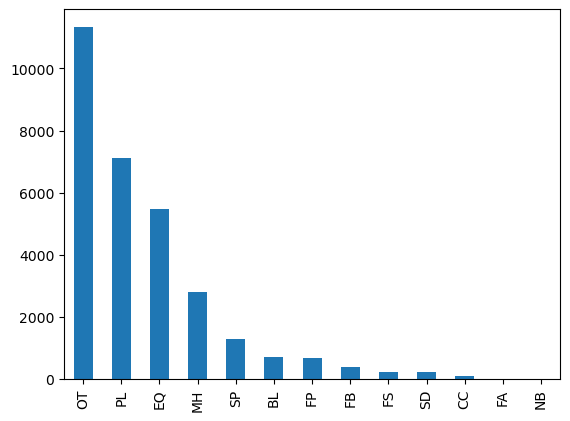





2.0    24175
1.0     6163
Name: bldg_type, dtype: int64



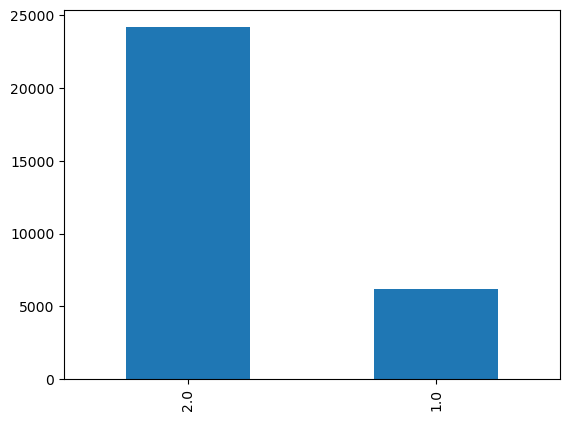





CORPORATION            10319
INDIVIDUAL              9452
PARTNERSHIP             7099
OTHER                   1186
CONDO/CO-OP             1054
OTHER GOV'T AGENCY       702
NYCHA/HHC                198
NYC AGENCY               133
NYCHA                    100
HPD                       48
DOE                       15
NY STATE                  13
HHC                       12
DCAS                       7
2022-05-09 00:00:00        0
Name: owner's_business_type, dtype: int64



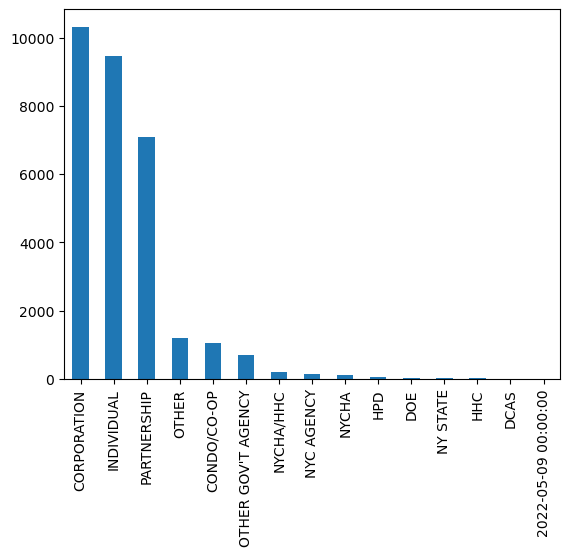





N    28352
Y     1986
8        0
        0
Name: non-profit, dtype: int64



C:\Users\manda\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


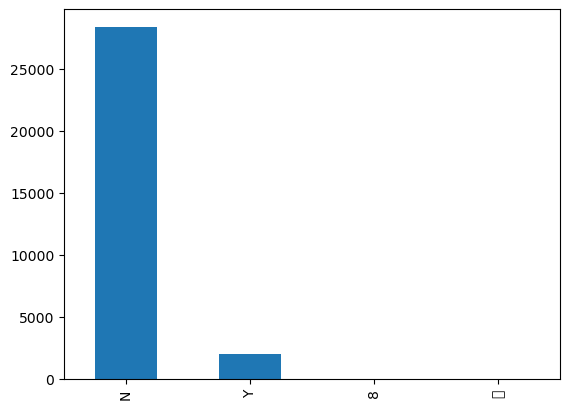





4.0     3944
3.0     2477
1.0     2070
2.0     1290
6.0     1218
33.0    1007
5.0      782
39.0     705
19.0     645
26.0     643
9.0      593
34.0     580
35.0     547
38.0     542
7.0      539
51.0     530
50.0     495
22.0     492
20.0     483
36.0     481
8.0      480
48.0     420
32.0     420
24.0     418
31.0     416
49.0     405
43.0     396
17.0     377
37.0     377
29.0     366
47.0     366
44.0     365
28.0     361
10.0     342
30.0     341
23.0     336
27.0     328
21.0     323
13.0     307
25.0     297
15.0     291
11.0     288
42.0     285
41.0     282
40.0     273
46.0     258
12.0     258
18.0     250
16.0     236
14.0     234
45.0     179
Name: council_district, dtype: int64



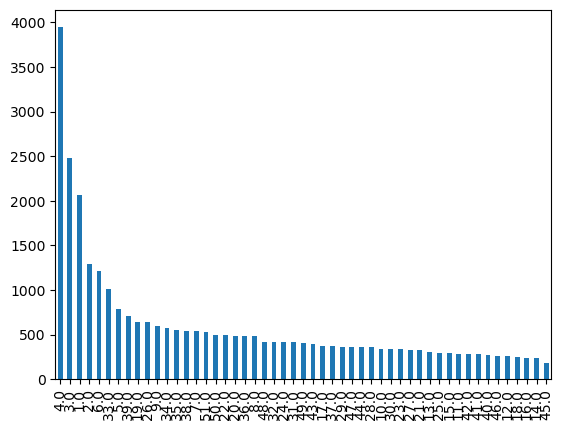

In [89]:
categorical_features = ['borough', 'job_type', 'work_type', 'bldg_type', "owner's_business_type", 'non-profit', 
                        'council_district']

for feature in categorical_features:
    print(df[feature].value_counts(), end='\n\n')
    df[feature].value_counts().plot(kind='bar')
    plt.show()
    print('\n\n\n')

In [90]:
df.zip_code.value_counts()

10022.0    811
10019.0    652
10003.0    620
10011.0    600
10013.0    581
          ... 
10123.0      2
11430.0      2
10278.0      1
10000.0      1
11005.0      1
Name: zip_code, Length: 217, dtype: int64

In [91]:
df['issuance_year'] = df.issuance_date.dt.year
df['issuance_month'] = df.issuance_date.dt.month
df['issuance_day'] = df.issuance_date.dt.day

df['job_start_year'] = df.job_start_date.dt.year
df['job_start_month'] = df.job_start_date.dt.month
df['job_start_day'] = df.job_start_date.dt.day

In [92]:
correlation_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
correlation_matrix

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,...,council_district,issuance_date,job_start_date,permit_type,issuance_year,issuance_month,issuance_day,job_start_year,job_start_month,job_start_day
borough,1.000000,0.035477,-0.017726,0.024053,0.000361,0.025912,-0.092152,-0.026375,-0.021583,-0.002130,...,-0.158368,0.006513,0.007888,0.036863,0.000218,-0.007387,-0.002098,0.016896,0.002383,-0.004962
job_type,0.035477,1.000000,0.193897,0.071827,0.067448,0.302588,-0.311613,-0.094428,-0.027334,0.293341,...,0.050756,0.112818,0.108552,0.352980,0.011990,0.009870,0.003187,0.016630,-0.002321,-0.000280
block,-0.017726,0.193897,1.000000,0.021926,0.081648,0.194987,-0.237570,-0.099883,0.000273,0.393723,...,0.118655,0.142061,0.145657,0.331893,0.027558,0.003476,0.004301,0.035398,-0.009106,-0.001716
lot,0.024053,0.071827,0.021926,1.000000,0.045223,0.045737,-0.127972,-0.055316,-0.030043,0.078549,...,0.042947,0.010799,0.010242,0.048377,0.000453,0.013128,0.008660,-0.002854,-0.000342,0.005520
zip_code,0.000361,0.067448,0.081648,0.045223,1.000000,0.027129,-0.117964,-0.001893,0.003183,0.020040,...,0.218837,0.009025,0.009443,0.014042,0.006204,-0.001173,0.005005,0.008199,-0.000857,0.003506
work_type,0.025912,0.302588,0.194987,0.045737,0.027129,1.000000,-0.097673,-0.038278,-0.003480,0.536218,...,0.014292,0.124739,0.131155,0.700292,-0.010729,0.005095,0.001915,0.002368,0.005273,0.000794
bldg_type,-0.092152,-0.311613,-0.237570,-0.127972,-0.117964,-0.097673,1.000000,0.292609,0.072686,-0.172157,...,-0.128117,0.009432,0.007283,-0.079498,0.009267,-0.003795,-0.001067,0.005391,0.002928,0.003519
owner's_business_type,-0.026375,-0.094428,-0.099883,-0.055316,-0.001893,-0.038278,0.292609,1.000000,0.196465,-0.074723,...,-0.037675,0.011180,0.004989,0.005552,0.004136,0.004065,0.000285,-0.023019,0.003222,0.010617
non-profit,-0.021583,-0.027334,0.000273,-0.030043,0.003183,-0.003480,0.072686,0.196465,1.000000,-0.019792,...,0.042198,-0.006795,-0.013103,-0.024019,-0.008351,0.000262,0.011608,-0.001817,-0.003046,0.012243
latitude,-0.002130,0.293341,0.393723,0.078549,0.020040,0.536218,-0.172157,-0.074723,-0.019792,1.000000,...,0.051129,0.269862,0.270312,0.745815,0.032110,0.012184,0.003499,0.039525,0.001869,-0.005879


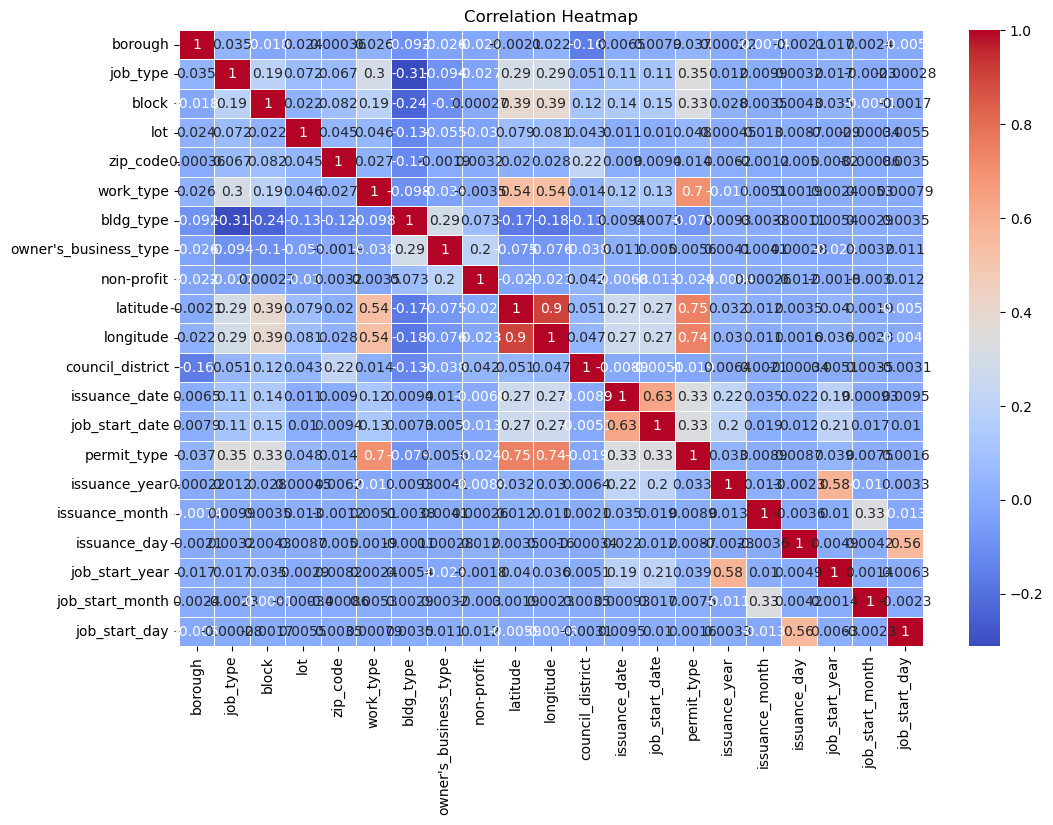

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [95]:
X = df[['borough', 'job_type', 'block', 'lot', 'zip_code', 'work_type', 'bldg_type',
        "owner's_business_type", 'non-profit', 'latitude', 'longitude',
        'council_district', 'issuance_year', 'issuance_month', 'issuance_day', 'job_start_year', 'job_start_month', 
        'job_start_day']]
y = df['permit_type']

In [96]:
le = LabelEncoder()
X['borough'] = le.fit_transform(X['borough'])
X['job_type'] = le.fit_transform(X['job_type'])
X["owner's_business_type"] = le.fit_transform(X["owner's_business_type"])
X['work_type'] = le.fit_transform(X['work_type'])
X['bldg_type'] = le.fit_transform(X['bldg_type'])
# X['block'] = le.fit_transform(X['block'])
# X['lot'] = le.fit_transform(X['lot'])
# X['zip_code'] = le.fit_transform(X['zip_code'])
X['non-profit'] = le.fit_transform(X['non-profit'])

C:\Users\manda\AppData\Local\Temp\ipykernel_33836\1937976821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['borough'] = le.fit_transform(X['borough'])
C:\Users\manda\AppData\Local\Temp\ipykernel_33836\1937976821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job_type'] = le.fit_transform(X['job_type'])
C:\Users\manda\AppData\Local\Temp\ipykernel_33836\1937976821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [98]:
#list for cols to scale
cols_to_scale = ['block','lot', 'zip_code', 'latitude', 'longitude', 'council_district', 'issuance_year',
                 'issuance_month', 'issuance_day', 'job_start_year', 'job_start_month', 'job_start_day']

#create and fit scaler
scaler = StandardScaler()

#scale selected data
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

C:\Users\manda\AppData\Local\Temp\ipykernel_33836\869922798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [101]:
with open('./Data/log_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [102]:
with open('./Data/log_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [103]:
y_pred = model.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred)

0.753955174686882

In [105]:
X_train

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,longitude,council_district,issuance_year,issuance_month,issuance_day,job_start_year,job_start_month,job_start_day
21021,3,1,0.737627,-0.267736,1.248052,0,1,6,0,0.504374,1.988195,-0.014427,-1.237021,0.155705,1.625997,-1.183125,0.121519,1.631868
24973,0,1,0.163565,-0.252565,-0.232203,9,1,6,0,1.197888,1.132032,-0.076288,-0.246604,0.451329,-0.661217,-0.190755,0.420760,-0.665203
1259,1,4,-0.120659,3.788350,1.020577,2,1,13,0,0.021349,-0.145718,0.851637,-0.246604,1.633824,1.397275,-0.190755,1.318483,-1.584031
14411,2,1,-0.600189,-0.252024,-0.991566,8,1,1,0,0.502860,-0.444198,-1.004213,-0.370406,-0.435543,-1.576103,-0.314801,-0.476963,-1.584031
9144,1,1,0.007881,-0.248231,1.045667,8,1,1,0,-0.258926,0.242160,0.913498,-0.865615,1.042576,0.825472,-0.810987,1.019242,0.827894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,3,1,0.645902,-0.216263,1.243034,9,1,6,0,0.430626,1.486213,0.047435,0.248604,1.042576,1.054193,-0.935033,-0.476963,-1.469178
5390,4,2,-0.918419,-0.222223,-0.519891,2,1,1,0,-1.235842,-1.615476,1.841423,-0.494208,0.451329,-1.690464,-0.438848,0.420760,-1.698885
860,0,2,0.601288,-0.272613,-0.243912,8,1,6,0,2.260876,1.246149,-0.447458,0.743812,1.042576,0.024947,0.801615,0.121519,0.598186
15795,2,1,-0.589893,3.788350,-0.991566,8,1,1,0,0.487182,-0.531571,-1.004213,0.991416,-0.731167,-0.661217,1.049708,-0.776204,-0.665203


# Fit Deep Learning Model

## Model Definition

In [106]:
import os
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [107]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18, 512),  
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 4),  
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return nn.functional.softmax(logits, dim=1)  

## Preparing Data For Training

In [108]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [115]:
# Creating TensorDatasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Creating DataLoaders
batch_size = 256  
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

## Model Training

In [116]:
model = NeuralNetwork()

In [117]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [118]:
num_epochs = 50  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 1.0980
Epoch [2/50], Loss: 0.9961
Epoch [3/50], Loss: 0.9476
Epoch [4/50], Loss: 0.9911
Epoch [5/50], Loss: 1.0398
Epoch [6/50], Loss: 1.0155
Epoch [7/50], Loss: 0.9961
Epoch [8/50], Loss: 1.0589
Epoch [9/50], Loss: 1.0883
Epoch [10/50], Loss: 1.0783
Epoch [11/50], Loss: 1.0154
Epoch [12/50], Loss: 0.9958
Epoch [13/50], Loss: 1.0204
Epoch [14/50], Loss: 1.0204
Epoch [15/50], Loss: 1.0107
Epoch [16/50], Loss: 1.0204
Epoch [17/50], Loss: 1.0537
Epoch [18/50], Loss: 1.0006
Epoch [19/50], Loss: 0.9912
Epoch [20/50], Loss: 1.0202
Epoch [21/50], Loss: 1.0492
Epoch [22/50], Loss: 1.0107
Epoch [23/50], Loss: 1.0495
Epoch [24/50], Loss: 1.0543
Epoch [25/50], Loss: 1.0735
Epoch [26/50], Loss: 1.0058
Epoch [27/50], Loss: 1.0495
Epoch [28/50], Loss: 1.0155
Epoch [29/50], Loss: 1.0543
Epoch [30/50], Loss: 1.0543
Epoch [31/50], Loss: 1.0641
Epoch [32/50], Loss: 0.9767
Epoch [33/50], Loss: 0.9427
Epoch [34/50], Loss: 1.0592
Epoch [35/50], Loss: 1.0349
Epoch [36/50], Loss: 0.9670
E

In [119]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy


0.7409360580092288